# Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression. Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation9 (plus some noise)

In [1]:
import numpy as np

m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.rand(m,1)

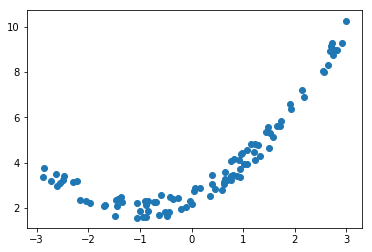

In [3]:
# Visualize
from matplotlib import pyplot as plt
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):


In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]

array([0.97070178])

In [7]:
X_poly[0]

array([0.97070178, 0.94226195])

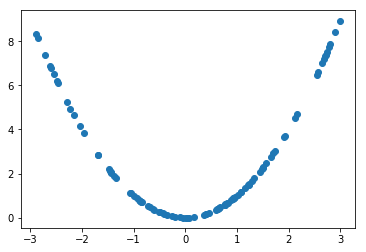

In [13]:
plt.scatter(X_poly[:,0],X_poly[:,1])

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.49584735]), array([[1.00443527, 0.49503936]]))

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

#### Warning: PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n+d)!/d! N! features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

# Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example,  figure below applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nd-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

<img src='img19.PNG'>

Of course, this high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data? 

In 'End to End Machine learning' chapter you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex. 

Another way is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []   
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])   
        y_train_predict = model.predict(X_train[:m])    
        y_val_predict = model.predict(X_val)  
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

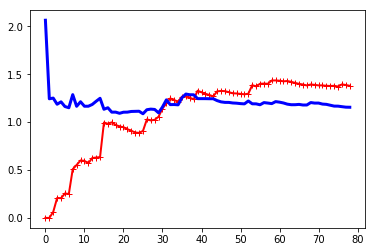

In [29]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

This deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve. 

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

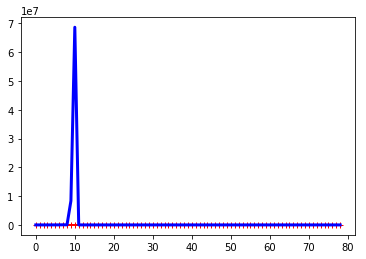

In [34]:
# Now let’s look at the learning curves of a 10th-degree polynomial model on the same data 

from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline((('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
                               ('sgd_reg',LinearRegression())))

plot_learning_curves(polynomial_regression,X,y)